In [1]:
import torch

torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [2]:
import pandas as pd

ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', encoding='latin-1')
users = pd.read_csv('BX-Users.csv', sep=';', encoding='latin-1')
books = pd.read_csv('BX-Books.csv', sep=';', encoding='latin-1', on_bad_lines="skip")

C:\Users\guy hadad\AppData\Local\Temp\ipykernel_14752\3153387282.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('BX-Books.csv', sep=';', encoding='latin-1', on_bad_lines="skip")


In [3]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [4]:
isbn_rating_count = ratings.groupby('ISBN')['Book-Rating'].count().reset_index(name='Number of Ratings')
isbn_rating_count

,ISBN,Number of Ratings
0,0330299891,2
1,0375404120,2
2,0586045007,1
3,9022906116,2
4,9032803328,1
...,...,...
340551,cn113107,1
340552,ooo7156103,1
340553,§423350229,1
340554,´3499128624,1


In [5]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [6]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


c:\Users\guy hadad\anaconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\guy hadad\anaconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\guy hadad\anaconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Book-Rating', ylabel='count'>

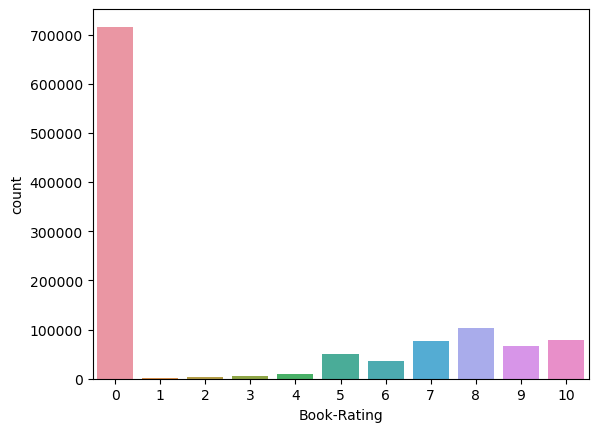

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.countplot(x=ratings['Book-Rating']) 

In [8]:
print(len(ratings['User-ID'].unique())) 
print(len(ratings['ISBN'].unique())) 

105283
340556


Text(0, 0.5, 'Count')

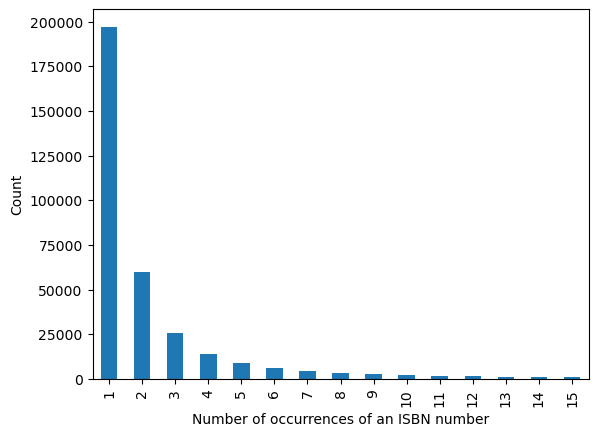

In [9]:
isbn_counts = ratings.groupby('ISBN').size()
count_occurrences = isbn_counts.value_counts()
count_occurrences[:15].plot(kind='bar')
plt.xlabel("Number of occurrences of an ISBN number")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

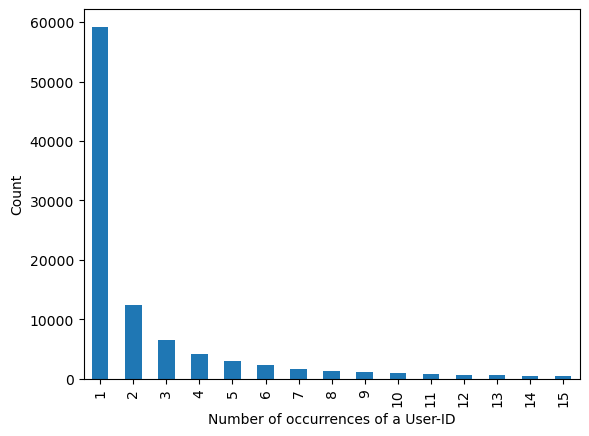

In [10]:
userid_counts = ratings.groupby('User-ID').size() 
count_occurrences = userid_counts.value_counts() 
count_occurrences[:15].plot(kind='bar')
plt.xlabel("Number of occurrences of a User-ID")
plt.ylabel("Count")

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split

import torch
import torch.nn.functional as F
from torch import nn, optim, Tensor

from torch_geometric.utils import structured_negative_sampling
from torch_geometric.nn.conv.gcn_conv import gcn_norm
from torch_geometric.nn import LGConv

In [12]:
df = pd.read_csv('BX-Book-Ratings.csv', sep=';', encoding='latin-1') 
users = pd.read_csv('BX-Users.csv', sep=';', encoding='latin-1') 
books = pd.read_csv('BX-Books.csv', sep=';', encoding='latin-1', on_bad_lines="skip") 

# Preprocessing
df = df.loc[df['ISBN'].isin(books['ISBN'].unique()) & df['User-ID'].isin(users['User-ID'].unique())]

# Keep the 100k highest ratings
df = df[df['Book-Rating'] >= 8].iloc[:100000]

C:\Users\guy hadad\AppData\Local\Temp\ipykernel_14752\915682528.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('BX-Books.csv', sep=';', encoding='latin-1', on_bad_lines="skip")


In [13]:
# Create mappings
user_mapping = {userid: i for i, userid in enumerate(df['User-ID'].unique())}
item_mapping = {isbn: i for i, isbn in enumerate(df['ISBN'].unique())}

# Count users and items
num_users = len(user_mapping)
num_items = len(item_mapping)
num_total = num_users + num_items

In [14]:
# Build the adjacency matrix based on user ratings
user_ids = torch.LongTensor([user_mapping[i] for i in df['User-ID']])
item_ids = torch.LongTensor([item_mapping[i] for i in df['ISBN']])
edge_index = torch.stack((user_ids, item_ids))

In [15]:
# Create training, validation, and test adjacency matrices
train_index, test_index = train_test_split(range(len(df)), test_size=0.2, random_state=0)


In [16]:
# import pickle

# # Assuming you have a pickle file named 'data.pkl' containing the dictionary
# pickle_file_path = 'summaries_all.pkl'

# # Load the pickled dictionary
# with open(pickle_file_path, 'rb') as f:
#     loaded_dict = pickle.load(f)

# # Now, loaded_dict contains the dictionary stored in the pickle file
# loaded_dict


In [17]:
# import wikipedia 
# from tqdm import tqdm
 
# def summary(isbn):
#   name = books[books["ISBN"] == isbn]["Book-Author"].values[0]
#   try:
#     result = wikipedia.summary(name, sentences=2, auto_suggest=False) 
#   except:
#     result = "not found"
#   return result

# for i in tqdm(df['ISBN'].unique()):
#     if i not in item_summary.keys():
#       item_summary[i] = summary(i)


# import pickle

# # File path where you want to save the pickle file
# file_path = 'summaries.pkl'

# # Save dictionary as a pickle file
# with open(file_path, 'wb') as f:
#     pickle.dump(item_summary, f)

# print("Dictionary saved as pickle file successfully.")


In [18]:
# import pickle

# # File path where you want to save the pickle file
# file_path = 'summaries_all.pkl'

# # Save dictionary as a pickle file
# with open(file_path, 'wb') as f:
#     pickle.dump(item_summary, f)

# print("Dictionary saved as pickle file successfully.")

In [19]:
# from sentence_transformers import SentenceTransformer
# from tqdm import tqdm

# model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
# item_emb = dict()

# for k,v in tqdm(loaded_dict.items()):
#     item_emb[k] = model.encode(v)

In [20]:
# # File path where you want to save the pickle file
# file_path = 'emb_all.pkl'

# # Save dictionary as a pickle file
# with open(file_path, 'wb') as f:
#     pickle.dump(item_emb, f)

# print("Dictionary saved as pickle file successfully.")

In [21]:
# import pickle

# # Assuming you have a pickle file named 'data.pkl' containing the dictionary
# pickle_file_path = 'emb_all.pkl'

# # Load the pickled dictionary
# with open(pickle_file_path, 'rb') as f:
#     emb = pickle.load(f)

# # Now, loaded_dict contains the dictionary stored in the pickle file
# emb

In [22]:
val_index, test_index = train_test_split(test_index, test_size=0.5, random_state=0)

train_edge_index = edge_index[:, train_index]
val_edge_index = edge_index[:, val_index]
test_edge_index = edge_index[:, test_index]

In [23]:
isbn_rating_count = df.groupby('ISBN')['Book-Rating'].count().reset_index(name='Number of Ratings')
isbn_rating_count

,ISBN,Number of Ratings
0,0001046438,1
1,0001047213,1
2,0001047973,2
3,0001048082,2
4,0001055607,1
...,...,...
56943,B0000VZEJQ,1
56944,B00011SOXI,1
56945,B00014WRH4,1
56946,B0001GMSV2,1


In [24]:
def sample_mini_batch(edge_index):
    # Generate BATCH_SIZE random indices
    index = np.random.choice(range(edge_index.shape[1]), size=BATCH_SIZE)

    # Generate negative sample indices
    edge_index = structured_negative_sampling(edge_index)
    edge_index = torch.stack(edge_index, dim=0)
    
    user_index = edge_index[0, index]
    pos_item_index = edge_index[1, index]
    neg_item_index = edge_index[2, index]
    
    return user_index, pos_item_index, neg_item_index

In [25]:
# import pickle

# # Assuming you have a pickle file named 'data.pkl' containing the dictionary
# pickle_file_path = 'emb_all.pkl'

# # Load the pickled dictionary
# with open(pickle_file_path, 'rb') as f:
#     loaded_dict = pickle.load(f)

# # Now, loaded_dict contains the dictionary stored in the pickle file
# loaded_dict

In [26]:
item_mapping_opposite = {v:k for k,v in item_mapping.items()}

In [27]:
# from tqdm import tqdm

# data = [[] for i in range(len(emb))]

# for i in tqdm(range(len(data))):
#     data[i] = emb[item_mapping_opposite[i]]
    


In [28]:
# data = np.array(data)
# data.shape

In [29]:
# from umap import UMAP
# from sklearn.preprocessing import MinMaxScaler

# # Scale features to [0,1] range
# X_scaled = MinMaxScaler().fit_transform(data)
# # Initialize and fit UMAP
# mapper = UMAP(n_components=64, metric="cosine").fit(X_scaled)
# # Create a DataFrame of 2D embeddings
# emb = mapper.embedding_

In [30]:
# # File path where you want to save the pickle file
# file_path = 'emb_reduced.pkl'

# # Save dictionary as a pickle file
# with open(file_path, 'wb') as f:
#     pickle.dump(emb, f)

# print("Dictionary saved as pickle file successfully.")

In [31]:
# import pickle

# # Assuming you have a pickle file named 'data.pkl' containing the dictionary
# pickle_file_path = 'emb_reduced.pkl'

# # Load the pickled dictionary
# with open(pickle_file_path, 'rb') as f:
#     emb = pickle.load(f)

# # Now, loaded_dict contains the dictionary stored in the pickle file
# emb.shape

In [32]:
class LightGCN(nn.Module):
    def __init__(self, num_users, num_items, num_layers=4, dim_h=64):
        super().__init__()
        
        self.num_users = num_users
        self.num_items = num_items
        self.num_layers = num_layers
        self.emb_users = nn.Embedding(num_embeddings=self.num_users, embedding_dim=dim_h)
        self.emb_items = nn.Embedding(num_embeddings=self.num_items, embedding_dim=dim_h)

        self.convs = nn.ModuleList(LGConv() for _ in range(num_layers))

        nn.init.normal_(self.emb_users.weight, std=0.01)
        nn.init.normal_(self.emb_items.weight, std=0.01)

    def forward(self, edge_index):
        emb = torch.cat([self.emb_users.weight, self.emb_items.weight])
        embs = [emb]

        for conv in self.convs:
            emb = conv(x=emb, edge_index=edge_index)
            embs.append(emb)

        emb_final = 1/(self.num_layers+1) * torch.mean(torch.stack(embs, dim=1), dim=1)

        emb_users_final, emb_items_final = torch.split(emb_final, [self.num_users, self.num_items])

        return emb_users_final, self.emb_users.weight, emb_items_final, self.emb_items.weight

In [33]:
class LightGCN_emb(nn.Module):
    def __init__(self, num_users, num_items, embeddings_pretrain, num_layers=4, dim_h=64):
        super().__init__()
        
        self.num_users = num_users
        self.num_items = num_items
        self.num_layers = num_layers
        self.emb_users = nn.Embedding(num_embeddings=self.num_users, embedding_dim=dim_h * 2)
        self.emb_items = nn.Embedding(num_embeddings=self.num_items, embedding_dim=dim_h)
        embeddings_pretrain = torch.tensor(embeddings_pretrain)
        embeddings_pretrain.requires_grad = False
        print(embeddings_pretrain.shape)
        print(self.emb_items.weight.data.shape)
        x = torch.cat((embeddings_pretrain,self.emb_items.weight.data), dim=1)
        self.emb_items = nn.Embedding(num_embeddings=self.num_items, embedding_dim=dim_h * 2)
        self.emb_items.weight.data.copy_(x)
        # self.emb_items.weight.requires_grad = False


        self.convs = nn.ModuleList(LGConv() for _ in range(num_layers))

        nn.init.normal_(self.emb_users.weight, std=0.01)
        # nn.init.normal_(self.emb_items.weight, std=0.01)

    def forward(self, edge_index):
        emb = torch.cat([self.emb_users.weight, self.emb_items.weight])
        embs = [emb]

        for conv in self.convs:
            emb = conv(x=emb, edge_index=edge_index)
            embs.append(emb)

        emb_final = 1/(self.num_layers+1) * torch.mean(torch.stack(embs, dim=1), dim=1)

        emb_users_final, emb_items_final = torch.split(emb_final, [self.num_users, self.num_items])

        return emb_users_final, self.emb_users.weight, emb_items_final, self.emb_items.weight

In [34]:
# Modify LightGCN to accept pre-trained embeddings
class LightGCN_emb_v2(nn.Module):
    def __init__(self, num_users, num_items, num_layers=4, dim_h=64, embeddings_pretrain=None):
        super().__init__()
        
        self.num_users = num_users
        self.num_items = num_items
        self.num_layers = num_layers
        self.emb_users = nn.Embedding(num_embeddings=self.num_users, embedding_dim=dim_h)
        self.emb_items = nn.Embedding(num_embeddings=self.num_items, embedding_dim=dim_h)
        self.emb_items_pretrained = nn.Embedding.from_pretrained(embeddings_pretrain, freeze=True)

        self.convs = nn.ModuleList(LGConv() for _ in range(num_layers))

        nn.init.normal_(self.emb_users.weight, std=0.01)
        nn.init.normal_(self.emb_items.weight, std=0.01)

    def forward(self, edge_index):
        emb = torch.cat([self.emb_users.weight, self.emb_items_pretrained.weight])
        embs = [emb]

        for conv in self.convs:
            emb = conv(x=emb, edge_index=edge_index)
            embs.append(emb)

        emb_final = 1/(self.num_layers+1) * torch.mean(torch.stack(embs, dim=1), dim=1)

        emb_users_final, emb_items_final = torch.split(emb_final, [self.num_users, self.num_items])

        return emb_users_final, self.emb_users.weight, emb_items_final, self.emb_items.weight

In [35]:
class LightGCN_emb_v3(nn.Module):
    def __init__(self, num_users, num_items, num_layers=4, dim_h=64):
            super().__init__()
            
            self.num_users = num_users
            self.num_items = num_items
            self.num_layers = num_layers
            self.emb_users = nn.Embedding(num_embeddings=self.num_users, embedding_dim=dim_h)
            self.emb_items = nn.Embedding(num_embeddings=self.num_items, embedding_dim=dim_h)

            self.convs = nn.ModuleList(LGConv() for _ in range(num_layers))

            nn.init.normal_(self.emb_users.weight, std=0.01)
            nn.init.normal_(self.emb_items.weight, std=0.01)

    def forward(self, edge_index, emb_items_pretrained=None):
        if emb_items_pretrained is not None:
            emb = torch.cat([self.emb_users.weight, emb_items_pretrained])
        else:
            emb = torch.cat([self.emb_users.weight, self.emb_items.weight])
        embs = [emb]

        for conv in self.convs:
            emb = conv(x=emb, edge_index=edge_index)
            embs.append(emb)

        emb_final = 1/(self.num_layers+1) * torch.mean(torch.stack(embs, dim=1), dim=1)

        emb_users_final, emb_items_final = torch.split(emb_final, [self.num_users, self.num_items])

        return emb_users_final, self.emb_users.weight, emb_items_final, self.emb_items.weight

In [49]:
def bpr_loss(emb_users_final, emb_users, emb_pos_items_final, emb_pos_items, emb_neg_items_final, emb_neg_items):
    reg_loss = LAMBDA * (emb_users.norm().pow(2) +
                        emb_pos_items.norm().pow(2) +
                        emb_neg_items.norm().pow(2))

    pos_ratings = torch.mul(emb_users_final, emb_pos_items_final).sum(dim=-1)
    neg_ratings = torch.mul(emb_users_final, emb_neg_items_final).sum(dim=-1)

    bpr_loss = torch.mean(torch.nn.functional.softplus(pos_ratings - neg_ratings))
    # bpr_loss = torch.mean(torch.nn.functional.logsigmoid(pos_ratings - neg_ratings))

    return -bpr_loss + reg_loss

from scipy.special import softmax

def enhanced_bpr_loss(emb_users_final, emb_users, emb_pos_items_final, emb_pos_items, emb_neg_items_final, emb_neg_items, margin=1.0, pos_weights=None):
    reg_loss = LAMBDA * (emb_users.norm().pow(2) +
                         emb_pos_items.norm().pow(2) +
                         emb_neg_items.norm().pow(2))

    pos_ratings = torch.mul(emb_users_final, emb_pos_items_final).sum(dim=-1)
    neg_ratings = torch.mul(emb_users_final, emb_neg_items_final).sum(dim=-1)

    # Introduce a margin
    basic_loss = pos_ratings - neg_ratings - margin

    # Apply weighting for positive samples if provided
    if pos_weights is not None:
        pos_weights = softmax(pos_weights)
        weighted_loss = torch.zeros_like(basic_loss)
        for ind, val in enumerate(basic_loss):
            weighted_loss[ind] = val * pos_weights[ind]
        # weighted_loss = basic_loss * pos_weights
    else:
        weighted_loss = basic_loss

    bpr_loss = torch.mean(torch.nn.functional.softplus(weighted_loss))

    return -bpr_loss + reg_loss


In [37]:
def get_user_items(edge_index):
    user_items = dict()
    for i in range(edge_index.shape[1]):
        user = edge_index[0][i].item()
        item = edge_index[1][i].item()
        if user not in user_items:
            user_items[user] = []
        user_items[user].append(item)
    return user_items

In [38]:
def compute_recall_at_k(items_ground_truth, items_predicted):
    num_correct_pred = np.sum(items_predicted, axis=1)
    num_total_pred = np.array([len(items_ground_truth[i]) for i in range(len(items_ground_truth))])

    recall = np.mean(num_correct_pred / num_total_pred)

    return recall

In [39]:
def compute_ndcg_at_k(items_ground_truth, items_predicted):
    test_matrix = np.zeros((len(items_predicted), K))

    for i, items in enumerate(items_ground_truth):
        length = min(len(items), K)
        test_matrix[i, :length] = 1
    
    max_r = test_matrix
    idcg = np.sum(max_r * 1. / np.log2(np.arange(2, K + 2)), axis=1)
    dcg = items_predicted * (1. / np.log2(np.arange(2, K + 2)))
    dcg = np.sum(dcg, axis=1)
    idcg[idcg == 0.] = 1.
    ndcg = dcg / idcg
    ndcg[np.isnan(ndcg)] = 0.
    
    return np.mean(ndcg)

In [40]:
# # wrapper function to get evaluation metrics
# def get_metrics(model, edge_index, exclude_edge_indices, item_mapping, emb=None, alpha=1):
#     if emb is None:
#         ratings = torch.matmul(model.emb_users.weight, model.emb_items.weight.T)
#     else:
#         # print(emb)
#         x = model.emb_items.weight.clone()  # Clone the entire tensor first to avoid modifying the original tensor
#         # Create a new tensor for modified embeddings
#         new_x = x.clone()
#         # y = model.emb_users.weight.clone()
#         for isbn, idx in item_mapping.items():  # Assuming item_mapping is {isbn: index}
#             if isbn in emb:
#                 # Update the new tensor with modified embeddings
#                 new_x[idx] = x[idx] + emb[isbn] * alpha
#         ratings = torch.matmul(model.emb_users.weight, new_x.T)
#         print(ratings.shape)

#     for exclude_edge_index in exclude_edge_indices:
#         user_pos_items = get_user_items(exclude_edge_index)
#         exclude_users = []
#         exclude_items = []
#         for user, items in user_pos_items.items():
#             exclude_users.extend([user] * len(items))
#             exclude_items.extend(items)
#         ratings[exclude_users, exclude_items] = -1024

#     # get the top k recommended items for each user
#     _, top_K_items = torch.topk(ratings, k=K)

#     # get all unique users in evaluated split
#     users = edge_index[0].unique()

#     test_user_pos_items = get_user_items(edge_index)

#     # convert test user pos items dictionary into a list
#     test_user_pos_items_list = [test_user_pos_items[user.item()] for user in users]

#     # determine the correctness of topk predictions
#     items_predicted = []
#     for user in users:
#         ground_truth_items = test_user_pos_items[user.item()]
#         label = list(map(lambda x: x in ground_truth_items, top_K_items[user]))
#         items_predicted.append(label)

#     recall = compute_recall_at_k(test_user_pos_items_list, items_predicted)
#     ndcg = compute_ndcg_at_k(test_user_pos_items_list, items_predicted)



def get_metrics(model, edge_index, exclude_edge_indices):

    ratings = torch.matmul(model.emb_users.weight, model.emb_items.weight.T)

    for exclude_edge_index in exclude_edge_indices:
        user_pos_items = get_user_items(exclude_edge_index)
        exclude_users = []
        exclude_items = []
        for user, items in user_pos_items.items():
            exclude_users.extend([user] * len(items))
            exclude_items.extend(items)
        ratings[exclude_users, exclude_items] = -1024

    # get the top k recommended items for each user
    _, top_K_items = torch.topk(ratings, k=K)

    # get all unique users in evaluated split
    users = edge_index[0].unique()

    test_user_pos_items = get_user_items(edge_index)

    # convert test user pos items dictionary into a list
    test_user_pos_items_list = [test_user_pos_items[user.item()] for user in users]

    # determine the correctness of topk predictions
    items_predicted = []
    for user in users:
        ground_truth_items = test_user_pos_items[user.item()]
        label = list(map(lambda x: x in ground_truth_items, top_K_items[user]))
        items_predicted.append(label)

    recall = compute_recall_at_k(test_user_pos_items_list, items_predicted)
    ndcg = compute_ndcg_at_k(test_user_pos_items_list, items_predicted)

    return recall, ndcg


In [41]:
# wrapper function to evaluate model
def test(model, edge_index, exclude_edge_indices):

    emb_users_final, emb_users, emb_items_final, emb_items = model.forward(edge_index)
    user_indices, pos_item_indices, neg_item_indices = structured_negative_sampling(edge_index, contains_neg_self_loops=False)

    emb_users_final, emb_users = emb_users_final[user_indices], emb_users[user_indices]

    emb_pos_items_final, emb_pos_items = emb_items_final[pos_item_indices], emb_items[pos_item_indices]
    emb_neg_items_final, emb_neg_items = emb_items_final[neg_item_indices], emb_items[neg_item_indices]

    loss = bpr_loss(emb_users_final, emb_users, emb_pos_items_final, emb_pos_items, emb_neg_items_final, emb_neg_items).item()

    recall, ndcg = get_metrics(model, edge_index, exclude_edge_indices)

    return loss, recall, ndcg


# wrapper function to evaluate model
def test_loss(model, edge_index, exclude_edge_indices):

    emb_users_final, emb_users, emb_items_final, emb_items = model.forward(edge_index)
    user_indices, pos_item_indices, neg_item_indices = structured_negative_sampling(edge_index, contains_neg_self_loops=False)

    emb_users_final, emb_users = emb_users_final[user_indices], emb_users[user_indices]

    emb_pos_items_final, emb_pos_items = emb_items_final[pos_item_indices], emb_items[pos_item_indices]
    emb_neg_items_final, emb_neg_items = emb_items_final[neg_item_indices], emb_items[neg_item_indices]

    loss = enhanced_bpr_loss(emb_users_final, emb_users, emb_pos_items_final, emb_pos_items, emb_neg_items_final, emb_neg_items).item()

    recall, ndcg = get_metrics(model, edge_index, exclude_edge_indices)

    return loss, recall, ndcg

In [42]:
# # Define the test function to accept pre-trained embeddings
# def test_emb(model, edge_index, exclude_edge_indices, emb_items_pretrained=None):


#     emb_users_final, emb_users, emb_items_final, emb_items = model.forward(edge_index, emb_items_pretrained=emb_items_pretrained)
#     user_indices, pos_item_indices, neg_item_indices = structured_negative_sampling(edge_index, contains_neg_self_loops=False)

#     emb_users_final, emb_users = emb_users_final[user_indices], emb_users[user_indices]

#     emb_pos_items_final, emb_pos_items = emb_items_final[pos_item_indices], emb_items[pos_item_indices]
#     emb_neg_items_final, emb_neg_items = emb_items_final[neg_item_indices], emb_items[neg_item_indices]

#     loss = bpr_loss(emb_users_final, emb_users, emb_pos_items_final, emb_pos_items, emb_neg_items_final, emb_neg_items).item()

#     recall, ndcg = get_metrics(model, edge_index, exclude_edge_indices)

#     return loss, recall, ndcg

In [43]:
K = 20
LAMBDA = 1e-6
BATCH_SIZE = 1024

In [44]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = LightGCN(num_users, num_items)
# model = LightGCN_emb_v3(num_users, num_items)

# model = LightGCN_emb(num_users, num_items, embeddings_pretrain=emb)
# emb = torch.tensor(emb)
# model = LightGCN_emb_v2(num_users, num_items, embeddings_pretrain=emb)
model = model.to(device)
edge_index = edge_index.to(device)
train_edge_index = train_edge_index.to(device)
val_edge_index = val_edge_index.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.0001)
K = 20
LAMBDA = 1e-6
BATCH_SIZE = 1024

In [45]:
# # Assuming loaded_dict is {ISBN: embedding}
# for isbn, embedding in isbn_to_reduced_embedding.items():
#     if not isinstance(embedding, torch.Tensor):
#         # Convert to tensor and ensure it's on the same device as the model
#         isbn_to_reduced_embedding[isbn] = torch.tensor(embedding).float().to(device)

# def test_emb(model, edge_index, exclude_edge_indices, loaded_dict, alpha=1):
#     # Original model embeddings
#     emb_users_final, emb_users, emb_items_final, emb_items = model.forward(edge_index)
#     # Instead of modifying emb_items_final directly, create a new tensor for the modified embeddings
#     new_emb_items_final = emb_items_final.clone()  # Clone the entire tensor first

# # for isbn, idx in item_mapping.items():  # Assuming item_mapping is {isbn: index}
# #     if isbn in loaded_dict:
# #         # Update the cloned tensor with modified embeddings
# #         new_emb_items_final[idx] = new_emb_items_final[idx] + loaded_dict[isbn]


#     # Now modify emb_items_final by incorporating pre-trained embeddings
#     for isbn, idx in item_mapping.items():  # Assuming item_mapping is {isbn: index}
#         if isbn in loaded_dict:
#             # Update the cloned tensor with modified embeddings
#             new_emb_items_final[idx] = new_emb_items_final[idx] + loaded_dict[isbn] * alpha


#     # After all modifications, you can replace the old emb_items_final with the new one
#     emb_items_final = new_emb_items_final
#     user_indices, pos_item_indices, neg_item_indices = structured_negative_sampling(edge_index, contains_neg_self_loops=False)

#     emb_users_final, emb_users = emb_users_final[user_indices], emb_users[user_indices]
#     emb_pos_items_final, emb_pos_items = emb_items_final[pos_item_indices], emb_items[pos_item_indices]
#     emb_neg_items_final, emb_neg_items = emb_items_final[neg_item_indices], emb_items[neg_item_indices]

#     loss = bpr_loss(emb_users_final, emb_users, emb_pos_items_final, emb_pos_items, emb_neg_items_final, emb_neg_items).item()

#     recall, ndcg = get_metrics(model, edge_index, exclude_edge_indices,item_mapping, isbn_to_reduced_embedding, alpha)

#     return loss, recall, ndcg

In [46]:
weights = {k:1 for k,v in item_mapping.items()}
from tqdm import tqdm

for i in tqdm(isbn_rating_count["ISBN"]):
    # try:
    weights[i] += isbn_rating_count[isbn_rating_count["ISBN"] == i]["Number of Ratings"].values[0]
    # except:
    #     continue
index_weights = {item_mapping[k]:v for k,v in weights.items()}

100%|██████████| 56948/56948 [06:09<00:00, 154.20it/s]


In [47]:
index_weights[10000]

2

In [ ]:
lr = 0.001
lamb = 1e-7
margin = 0.4

In [51]:
%%time

n_batch = int(len(train_index)/BATCH_SIZE)
dic = dict()

# for l in [1e-6, 5e-6, 1e-7, 5e-7, 1e-8]:
LAMBDA = 1e-7
model = LightGCN(num_users, num_items)
model = model.to(device)
edge_index = edge_index.to(device)
train_edge_index = train_edge_index.to(device)
val_edge_index = val_edge_index.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)
max_recall = 0
recalls = []
for epoch in range(31):
    model.train()

    for _ in range(n_batch):
        optimizer.zero_grad()

        emb_users_final, emb_users, emb_items_final, emb_items = model.forward(train_edge_index)

        user_indices, pos_item_indices, neg_item_indices = sample_mini_batch(train_edge_index)

        emb_users_final, emb_users = emb_users_final[user_indices], emb_users[user_indices]
        emb_pos_items_final, emb_pos_items = emb_items_final[pos_item_indices], emb_items[pos_item_indices]
        emb_neg_items_final, emb_neg_items = emb_items_final[neg_item_indices], emb_items[neg_item_indices]
        # print(pos_item_indices[0].item())
        weights_loss = [index_weights[i.item()] for i in pos_item_indices]
        # train_loss = bpr_loss(emb_users_final, emb_users, emb_pos_items_final, emb_pos_items, emb_neg_items_final, emb_neg_items)
        train_loss = enhanced_bpr_loss(emb_users_final, emb_users, emb_pos_items_final, emb_pos_items, emb_neg_items_final, emb_neg_items, margin=0.4, pos_weights=weights_loss)

        train_loss.backward()
        optimizer.step()

    if epoch % 5 == 0:
        model.eval()
        val_loss, recall, ndcg = test(model, val_edge_index, [train_edge_index])
        print(f"Epoch {epoch} | Train loss: {train_loss.item():.5f} | Val loss: {val_loss:.5f} | Val recall@{K}: {recall:.5f} | Val ndcg@{K}: {ndcg:.5f}")
        recalls.append(recall)
        if recall > max_recall:
            max_recall = recall
    # print(lr, max_recall)
            # val_loss, recall, ndcg = test_loss(model, val_edge_index, [train_edge_index])
            # print(f"Epoch {epoch} |Diffrent loss: Train loss: {train_loss.item():.5f} | Val loss: {val_loss:.5f} | Val recall@{K}: {recall:.5f} | Val ndcg@{K}: {ndcg:.5f}")


# for epoch in range(51):
#     model.train()

#     for _ in range(n_batch):
#         optimizer.zero_grad()

#         emb_users_final, emb_users, emb_items_final, emb_items = model.forward(train_edge_index)

#         user_indices, pos_item_indices, neg_item_indices = sample_mini_batch(train_edge_index)
        
#         emb_users_final, emb_users = emb_users_final[user_indices], emb_users[user_indices]
#         emb_pos_items_final, emb_pos_items = emb_items_final[pos_item_indices], emb_items[pos_item_indices]
#         emb_neg_items_final, emb_neg_items = emb_items_final[neg_item_indices], emb_items[neg_item_indices]

#         train_loss = bpr_loss(emb_users_final, emb_users, emb_pos_items_final, emb_pos_items, emb_neg_items_final, emb_neg_items)

#         train_loss.backward()
#         optimizer.step()

#     if epoch % 5 == 0:
#         model.eval()
#         # val_loss, recall, ndcg = test(model, val_edge_index, [train_edge_index])
#         val_loss, recall, ndcg = test(model, val_edge_index, [train_edge_index], emb)
#         print(f"Epoch {epoch} | Train loss: {train_loss.item():.5f} | Val loss: {val_loss:.5f} | Val recall@{K}: {recall:.5f} | Val ndcg@{K}: {ndcg:.5f}")

Epoch 0 | Train loss: -0.69299 | Val loss: -0.69312 | Val recall@20: 0.00350 | Val ndcg@20: 0.00285
Epoch 5 | Train loss: -0.69197 | Val loss: -0.68216 | Val recall@20: 0.00372 | Val ndcg@20: 0.00340
Epoch 10 | Train loss: -0.73494 | Val loss: -0.64828 | Val recall@20: 0.00559 | Val ndcg@20: 0.00431
Epoch 15 | Train loss: -0.73348 | Val loss: -0.59772 | Val recall@20: 0.00586 | Val ndcg@20: 0.00444
Epoch 20 | Train loss: -0.74305 | Val loss: -0.52323 | Val recall@20: 0.00582 | Val ndcg@20: 0.00450
Epoch 25 | Train loss: -0.95227 | Val loss: -0.44647 | Val recall@20: 0.00653 | Val ndcg@20: 0.00476


0.00011
0.00774
0.01501
0.01608
0.01610
0.01681
0.01741
0.01764
0.01891
0.01778
0.01791

In [99]:
%%time

n_batch = int(len(train_index)/BATCH_SIZE)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LightGCN(num_users, num_items)
model = model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
K = 20
LAMBDA = 1e-6
BATCH_SIZE = 1024
edge_index = edge_index.to(device)
train_edge_index = train_edge_index.to(device)
val_edge_index = val_edge_index.to(device)
max_recall = 0
recalls_b = []
for epoch in range(101):
    model.train()

    for _ in range(n_batch):
        optimizer.zero_grad()

        emb_users_final, emb_users, emb_items_final, emb_items = model.forward(train_edge_index)

        user_indices, pos_item_indices, neg_item_indices = sample_mini_batch(train_edge_index)
        # print(pos_item_indices)
        weights_loss = [index_weights[i] for i in pos_item_indices]
        # print(neg_item_indices)
        
        emb_users_final, emb_users = emb_users_final[user_indices], emb_users[user_indices]
        emb_pos_items_final, emb_pos_items = emb_items_final[pos_item_indices], emb_items[pos_item_indices]
        emb_neg_items_final, emb_neg_items = emb_items_final[neg_item_indices], emb_items[neg_item_indices]

        train_loss = bpr_loss(emb_users_final, emb_users, emb_pos_items_final, emb_pos_items, emb_neg_items_final, emb_neg_items)
        # train_loss = enhanced_bpr_loss(emb_users_final, emb_users, emb_pos_items_final, emb_pos_items, emb_neg_items_final, emb_neg_items, margin=0.4)

        train_loss.backward()
        optimizer.step()

    if epoch % 5 == 0:
        model.eval()
        val_loss, recall, ndcg = test(model, val_edge_index, [train_edge_index])
        print(f"Epoch {epoch} | Train loss: {train_loss.item():.5f} | Val loss: {val_loss:.5f} | Val recall@{K}: {recall:.5f} | Val ndcg@{K}: {ndcg:.5f}")
        recalls_b.append(recall)
        if recall > max_recall:
            max_recall = recall
print(max_recall)

tensor([56037, 36077, 28321,  ..., 54563, 51892,  3395])
tensor([38648, 43796, 14825,  ...,  7469, 38809, 26825])
tensor([  646, 36734, 34820,  ...,  6512, 37185, 36797])
tensor([17714, 27426, 27074,  ...,  5851,  2829, 46869])
tensor([11894,  6459, 41766,  ...,  5499,   595, 19710])
tensor([  318, 51595,  9661,  ..., 52676,  6226, 10400])
tensor([ 6543, 14596, 53665,  ..., 29711, 20789, 45278])
tensor([ 4002, 25346, 29654,  ..., 36839, 26872,  6990])


KeyboardInterrupt: 

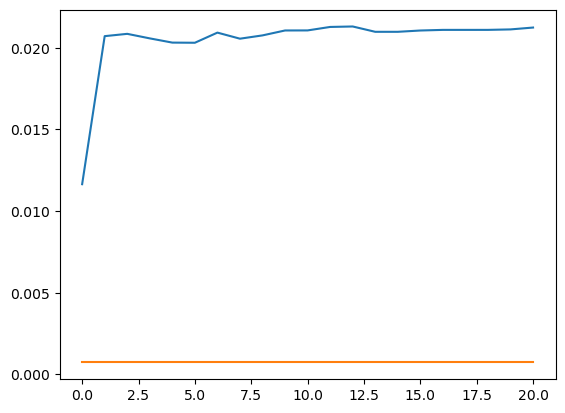

In [ ]:
first = [
    0.00007,
    0.00910,
    0.01515,
    0.01666,
    0.01691,
    0.01638,
    0.01695,
    0.01814,
    0.01765,
    0.01819,
    0.01866
]
sec = [
0.01417,
0.01885,
0.01924,
0.01944,
0.01912,
0.02033,
0.01966,
0.01986,
0.01986,
0.01999,
0.01999
]

import matplotlib.pyplot as plt

plt.plot(recalls)
plt.plot(recalls_b)
plt.show()

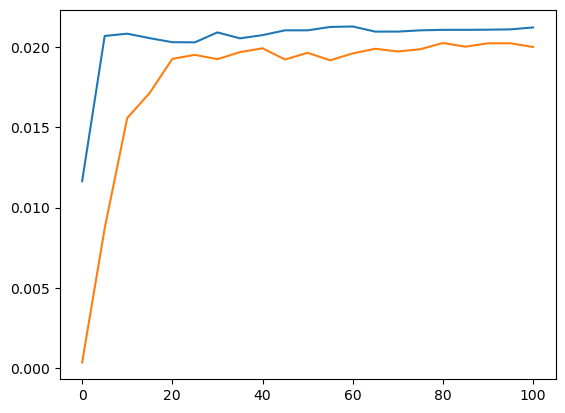

In [ ]:
epochs = list(range(0, 101, 5))

val_recall_loss = [
    0.01165, 0.02071, 0.02085, 0.02057, 0.02032,
    0.02031, 0.02093, 0.02056, 0.02076, 0.02106,
    0.02106, 0.02127, 0.02130, 0.02098, 0.02098,
    0.02106, 0.02109, 0.02109, 0.02110, 0.02112, 0.02124
]

val_ndcg_loss = [
    0.00564, 0.00995, 0.01011, 0.01004, 0.01002,
    0.01000, 0.01021, 0.01004, 0.01009, 0.01018,
    0.01016, 0.01029, 0.01029, 0.01021, 0.01021,
    0.01018, 0.01019, 0.01016, 0.01016, 0.01018, 0.01018
]
val_recall_base = [
    0.00034, 0.00871, 0.01559, 0.01716, 0.01928, 0.01953, 0.01926,
    0.01970, 0.01994, 0.01924, 0.01966, 0.01919, 0.01962, 0.01991,
    0.01974, 0.01988, 0.02027, 0.02004, 0.02025, 0.02025, 0.02002
]

val_ndcg_base = [
    0.00010, 0.00433, 0.00669, 0.00781, 0.00853, 0.00890, 0.00865,
    0.00904, 0.00884, 0.00875, 0.00890, 0.00879, 0.00908, 0.00913,
    0.00913, 0.00900, 0.00919, 0.00933, 0.00941, 0.00939, 0.00935
]
import matplotlib.pyplot as plt

plt.plot(epochs, val_recall_loss)
plt.plot(epochs,val_recall_base )
plt.show()

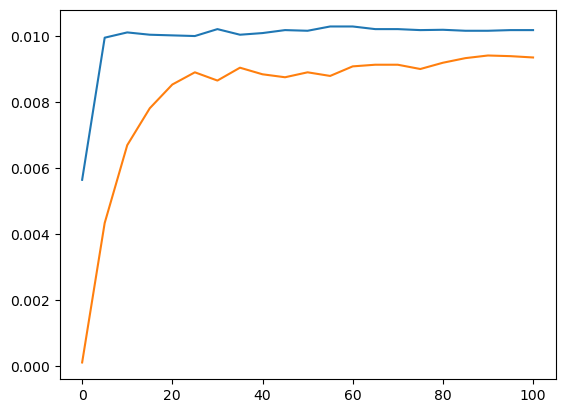

In [ ]:
plt.plot(epochs, val_ndcg_loss)
plt.plot(epochs, val_ndcg_base)
plt.show()

In [ ]:
# for a in [0, 1,10,100, 1000]:
#     test_loss, test_recall, test_ndcg = test_emb(model, test_edge_index.to(device), [train_edge_index, val_edge_index], isbn_to_reduced_embedding, alpha=a)
#     print(f"Test loss: {test_loss:.5f} | Test recall@{K}: {test_recall:.5f} | Test ndcg@{K}: {test_ndcg:.5f}")

NameError: name 'test_emb' is not defined

In [ ]:
# from tqdm import tqdm
# from umap import UMAP
# from sklearn.preprocessing import MinMaxScaler

# # Assuming `isbn_to_embedding` is your dictionary of ISBN: embedding
# isbn_to_embedding = {isbn: embedding for isbn, embedding in emb.items()}  # Adjust according to your variable names

# # Convert embeddings to a list for processing
# data = [embedding for isbn, embedding in isbn_to_embedding.items()]

# # Scale features to [0,1] range
# X_scaled = MinMaxScaler().fit_transform(data)

# # Initialize and fit UMAP
# mapper = UMAP(n_components=64, metric="cosine").fit(X_scaled)

# # Get the reduced embeddings
# reduced_embeddings = mapper.embedding_

# # Map reduced embeddings back to ISBNs
# isbn_to_reduced_embedding = {isbn: reduced_embeddings[i] for i, isbn in enumerate(isbn_to_embedding.keys())}

# At this point, `isbn_to_reduced_embedding` is your desired dictionary of ISBN: reduced embeddings


In [ ]:
# # Assuming loaded_dict is {ISBN: embedding}
# for isbn, embedding in isbn_to_reduced_embedding.items():
#     if not isinstance(embedding, torch.Tensor):
#         # Convert to tensor and ensure it's on the same device as the model
#         isbn_to_reduced_embedding[isbn] = torch.tensor(embedding).float().to(device)


# def test_emb(model, edge_index, exclude_edge_indices, loaded_dict):
#     # Original model embeddings
#     emb_users_final, emb_users, emb_items_final, emb_items = model.forward(edge_index)
#     # Instead of modifying emb_items_final directly, create a new tensor for the modified embeddings
#     new_emb_items_final = emb_items_final.clone()  # Clone the entire tensor first

# # for isbn, idx in item_mapping.items():  # Assuming item_mapping is {isbn: index}
# #     if isbn in loaded_dict:
# #         # Update the cloned tensor with modified embeddings
# #         new_emb_items_final[idx] = new_emb_items_final[idx] + loaded_dict[isbn]


#     # Now modify emb_items_final by incorporating pre-trained embeddings
#     for isbn, idx in item_mapping.items():  # Assuming item_mapping is {isbn: index}
#         if isbn in loaded_dict:
#             # Update the cloned tensor with modified embeddings
#             new_emb_items_final[idx] = new_emb_items_final[idx] + loaded_dict[isbn]


#     # After all modifications, you can replace the old emb_items_final with the new one
#     emb_items_final = new_emb_items_final
#     user_indices, pos_item_indices, neg_item_indices = structured_negative_sampling(edge_index, contains_neg_self_loops=False)

#     emb_users_final, emb_users = emb_users_final[user_indices], emb_users[user_indices]
#     emb_pos_items_final, emb_pos_items = emb_items_final[pos_item_indices], emb_items[pos_item_indices]
#     emb_neg_items_final, emb_neg_items = emb_items_final[neg_item_indices], emb_items[neg_item_indices]

#     loss = bpr_loss(emb_users_final, emb_users, emb_pos_items_final, emb_pos_items, emb_neg_items_final, emb_neg_items).item()

#     recall, ndcg = get_metrics(model, edge_index, exclude_edge_indices)

#     return loss, recall, ndcg

# test_emb(model, val_edge_index, [train_edge_index], isbn_to_reduced_embedding)

(-0.6926552653312683, 0.017414706378262278, 0.008096512606941818)

In [ ]:
test_loss, test_recall, test_ndcg = test(model, test_edge_index.to(device), [train_edge_index, val_edge_index])

print(f"Test loss: {test_loss:.5f} | Test recall@{K}: {test_recall:.5f} | Test ndcg@{K}: {test_ndcg:.5f}")

Test loss: -0.69088 | Test recall@20: 0.01596 | Test ndcg@20: 0.00751


In [ ]:
bookid_title = pd.Series(books['Book-Title'].values, index=books.ISBN).to_dict()
bookid_author = pd.Series(books['Book-Author'].values, index=books.ISBN).to_dict()
user_pos_items = get_user_items(edge_index)

In [ ]:
from PIL import Image
import requests

def recommend(user_id, num_recs):
    user = user_mapping[user_id]
    emb_user = model.emb_users.weight[user]
    ratings = model.emb_items.weight @ emb_user

    values, indices = torch.topk(ratings, k=100)

    ids = [index.cpu().item() for index in indices if index in user_pos_items[user]][:num_recs]
    item_isbns = [list(item_mapping.keys())[list(item_mapping.values()).index(book)] for book in ids]
    titles = [bookid_title[id] for id in item_isbns]
    authors = [bookid_author[id] for id in item_isbns]

    print(f'Favorite books from user n°{user_id}:')
    for i in range(len(item_isbns)):
        print(f'- {titles[i]}, by {authors[i]}')

    ids = [index.cpu().item() for index in indices if index not in user_pos_items[user]][:num_recs]
    item_isbns = [list(item_mapping.keys())[list(item_mapping.values()).index(book)] for book in ids]
    titles = [bookid_title[id] for id in item_isbns]
    authors = [bookid_author[id] for id in item_isbns]

    print(f'\nRecommended books for user n°{user_id}')
    for i in range(num_recs):
        print(f'- {titles[i]}, by {authors[i]}')

    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    fig, axs = plt.subplots(1, num_recs, figsize=(20,6))
    fig.patch.set_alpha(0)
    for i, title in enumerate(titles):
        url = books.loc[books['Book-Title'] == title]['Image-URL-L'][:1].values[0]
        img = Image.open(requests.get(url, stream=True, headers=headers).raw)
        rating = df.loc[df['ISBN'] == books.loc[books['Book-Title'] == title]['ISBN'][:1].values[0]]['Book-Rating'].mean()
        axs[i].axis("off")
        axs[i].imshow(img)
        axs[i].set_title(f'{rating:.1f}/10', y=-0.1, fontsize=18)

In [ ]:
recommend(277427, 5)